In [1]:
import cv2
import matplotlib.pyplot as plt

import numpy as np

In [2]:
import sys

sys.path.append("../remx/utils")

from images import (
    letterbox,
    ImgSize,
    img_resize,
    inverse_letterbox_coordinate_transform,
)

In [3]:
img = cv2.imread("../datasets/test/elephant-2.jpg")
img_letterboxed = letterbox(np.asarray(img), ImgSize(640, 640))


# Save the image
cv2.imwrite("../datasets/test/elephant-5.jpg", img_letterboxed)

True

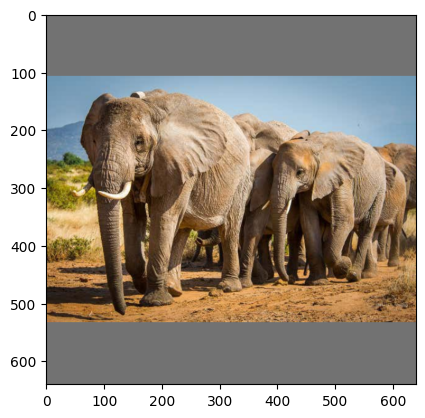

In [4]:
# One common reason for this issue is the ordering of color channels.
# OpenCV uses BGR (Blue, Green, Red) channel order by default,
# while Matplotlib uses RGB (Red, Green, Blue) order.
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_letterboxed = letterbox(np.asarray(img_rgb), ImgSize(640, 640))
plt.imshow(img_letterboxed)

To map a point from the img_letterboxed image to the original image, you can use the following formula:

x_original = (x_letterboxed - pad_w) \* original_width / letterboxed_width

y_original = (y_letterboxed - pad_h) \* original_height / letterboxed_height


<function matplotlib.pyplot.show(close=None, block=None)>

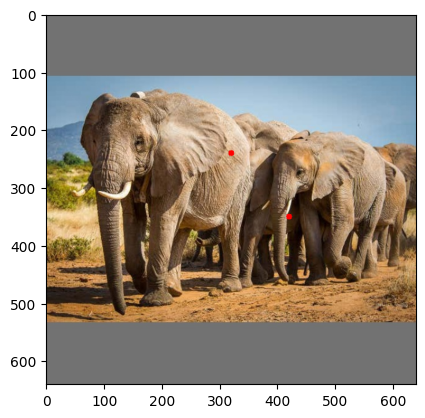

In [9]:
# Load the image
img = cv2.imread("../datasets/test/elephant-5.jpg")

letterboxed_size = (img_letterboxed.shape[1], img_letterboxed.shape[0])
original_size = (img.shape[1], img.shape[0])
# Define the x,y coordinate of the point
x1, y1 = 320, 240
x2, y2 = 420, 350

# Draw a circle at the specified point
cv2.circle(img, (x1, y1), 5, (0, 0, 255), -1)
cv2.circle(img, (x2, y2), 5, (0, 0, 255), -1)


# Display the letterboxed image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

[(300, 125, 394, 228)]


<function matplotlib.pyplot.show(close=None, block=None)>

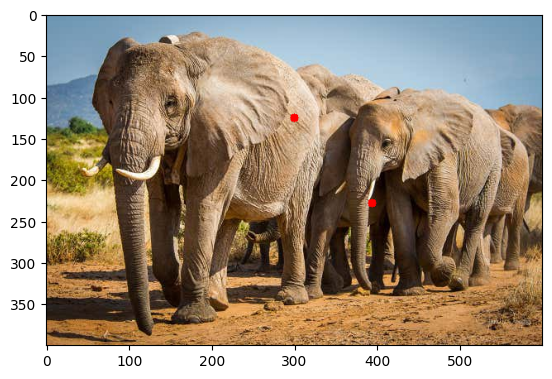

In [11]:
# Load the image
img = cv2.imread("../datasets/test/elephant-2.jpg")

# Define the x,y coordinate of the point
# x, y = (300, 125)
coordinates = inverse_letterbox_coordinate_transform(
    # [(x1, y1, x2, y2)]
    [(320, 240, 420, 350)],
    ImgSize(img.shape[1], img.shape[0]),
    ImgSize(640, 640),
)

print(coordinates)

x1 = coordinates[0][0]
y1 = coordinates[0][1]

x2 = coordinates[0][2]
y2 = coordinates[0][3]

# print(round(5 * (400 / 600))) # to make size of point to the letterbox
# Draw a circle at the specified point
cv2.circle(img, (x1, y1), 5, (0, 0, 255), -1)
cv2.circle(img, (x2, y2), 5, (0, 0, 255), -1)

# Display the letterboxed image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show